In [5]:
import numpy as np
import sys
sys.path.append("/home/zoker/quict/")

from QuICT.core import Circuit
from QuICT.core.gate import *

In [25]:
class CoinedQuantumWalkOnLines:
    def __init__(self, nodes: int, init_pos: int = 0, coin_operator: BasicGate = H):
        self.pos_qubits = int(np.ceil(np.log2(nodes)))
        self.act_qubits = nodes - 1
        self.n_qubits = self.pos_qubits + self.act_qubits
        self.C = coin_operator
        self.S = Z

    def throw_coin(self):
        self.coin_state = (self.C @ self.coin_state.T).T

    def shift(self):
        new_state = self.coin_state.copy()
        for n in np.where(abs(self.coin_state[:, 0]) > 0)[0]:
            new_state[n + 1][0] += self.coin_state[n][0]
            new_state[n][0] -= self.coin_state[n][0]

        for n in np.where(abs(self.coin_state[:, 1]) > 0)[0]:
            new_state[n - 1][1] += self.coin_state[n][1]
            new_state[n][1] -= self.coin_state[n][1]
        self.coin_state = new_state
    
    def _build_coin_operator(self):
        return
    
    def _build_shift_operator(self):
        return
    
    def construct_circuit(self, step):
        circuit = Circuit(self.n_qubits)
        action_qubits = [self.pos_qubits + i for i in range(self.act_qubits)]
        for t in range(step):
            for qid in action_qubits:
                self.C | circuit(qid)
            for qid in range(self.pos_qubits):
                self.S | circuit(qid)
        return circuit

2022-12-28 13:18:21 | circuit | INFO | Initial Quantum Circuit circuit_0bab8246866f11edb7dbd1b4697930d0 with 7 qubits.


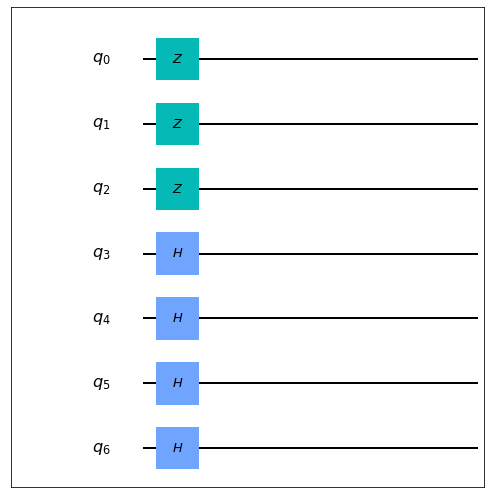

[ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
  0.25+0.j  0.25+0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j
 -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j
 -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j
 -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j
 -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j  0.  -0.j
  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j
  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j
  0.  -0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j
 -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j -0.  +0.j
 -0.  +0.j -0.  +0.j -0.  +0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j
  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j
  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j  0.  -0.j
  0.  

In [26]:
from QuICT.simulation.state_vector import ConstantStateVectorSimulator

task = CoinedQuantumWalkOnLines(5)
circuit = task.construct_circuit(1)
simulator = ConstantStateVectorSimulator()
sv = simulator.run(circuit)
circuit.draw()
print(sv)

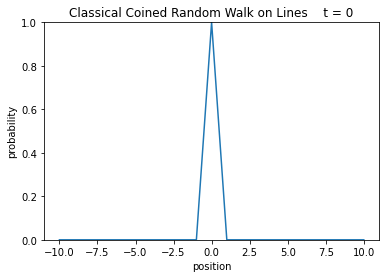

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.70710678 0.70710678]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


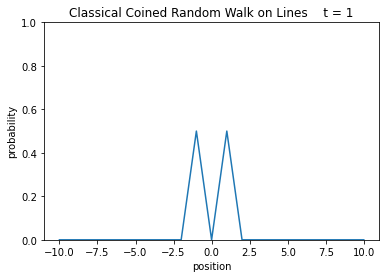

[[ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.5 -0.5]
 [ 0.   0. ]
 [ 0.5  0.5]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]]


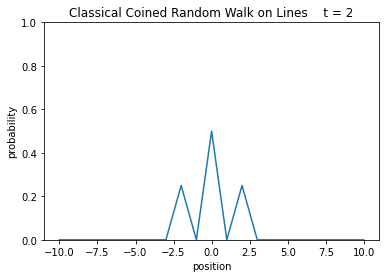

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.35355339  0.35355339]
 [ 0.          0.        ]
 [ 0.70710678  0.        ]
 [ 0.          0.        ]
 [ 0.35355339  0.35355339]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


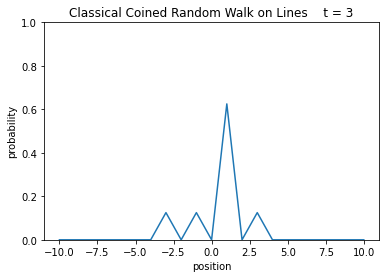

[[ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.25 -0.25]
 [ 0.    0.  ]
 [-0.25 -0.25]
 [ 0.    0.  ]
 [ 0.75  0.25]
 [ 0.    0.  ]
 [ 0.25  0.25]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]]


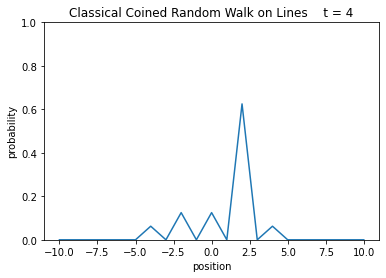

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.1767767   0.1767767 ]
 [ 0.          0.        ]
 [ 0.          0.35355339]
 [ 0.          0.        ]
 [ 0.         -0.35355339]
 [ 0.          0.        ]
 [ 0.70710678  0.35355339]
 [ 0.          0.        ]
 [ 0.1767767   0.1767767 ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


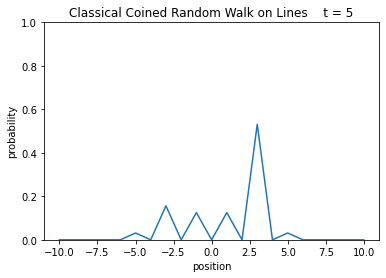

[[ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.125 -0.125]
 [ 0.     0.   ]
 [ 0.125 -0.375]
 [ 0.     0.   ]
 [-0.25   0.25 ]
 [ 0.     0.   ]
 [ 0.25  -0.25 ]
 [ 0.     0.   ]
 [ 0.625  0.375]
 [ 0.     0.   ]
 [ 0.125  0.125]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]]


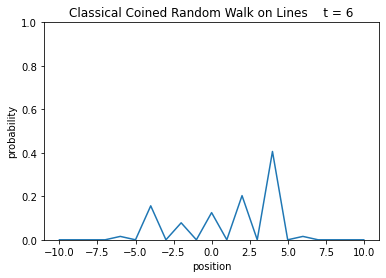

[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-8.83883476e-02  8.83883476e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.76776695e-01  3.53553391e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.65165043e-01 -8.83883476e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [-3.53553391e-01  2.77555756e-17]
 [ 0.00000000e+00  0.00000000e+00]
 [ 4.41941738e-01 -8.83883476e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [ 5.30330086e-01  3.53553391e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 8.83883476e-02  8.83883476e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]


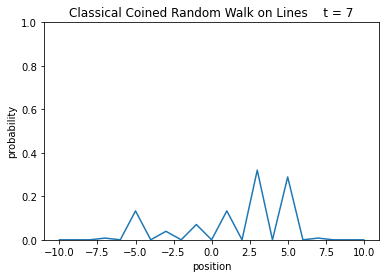

[[ 0.      0.    ]
 [ 0.      0.    ]
 [ 0.      0.    ]
 [ 0.0625 -0.0625]
 [ 0.      0.    ]
 [ 0.1875 -0.3125]
 [ 0.      0.    ]
 [-0.1875 -0.0625]
 [ 0.      0.    ]
 [ 0.1875  0.1875]
 [ 0.      0.    ]
 [-0.3125 -0.1875]
 [ 0.      0.    ]
 [ 0.5625  0.0625]
 [ 0.      0.    ]
 [ 0.4375  0.3125]
 [ 0.      0.    ]
 [ 0.0625  0.0625]
 [ 0.      0.    ]
 [ 0.      0.    ]
 [ 0.      0.    ]]


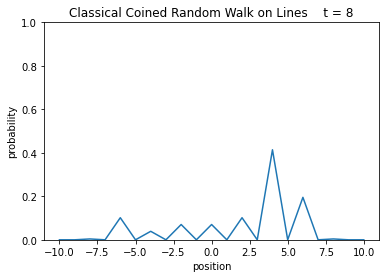

[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-4.41941738e-02  4.41941738e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.76776695e-01  2.65165043e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 8.83883476e-02  1.76776695e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17 -2.65165043e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  2.65165043e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.76776695e-01 -2.65165043e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 6.18718434e-01  1.76776695e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 3.53553391e-01  2.65165043e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 4.41941738e-02  4.41941738e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]


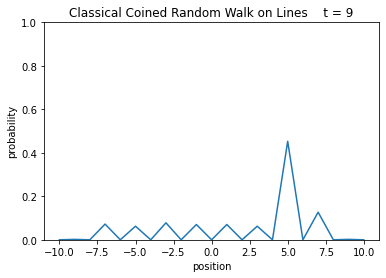

[[ 0.00000000e+00  0.00000000e+00]
 [ 3.12500000e-02 -3.12500000e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.56250000e-01 -2.18750000e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 4.16333634e-17 -2.50000000e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.25000000e-01  2.50000000e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.87500000e-01 -1.87500000e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.87500000e-01  1.87500000e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.38777878e-17 -2.50000000e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 6.25000000e-01  2.50000000e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.81250000e-01  2.18750000e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 3.12500000e-02  3.12500000e-02]
 [ 0.00000000e+00  0.00000000e+00]]


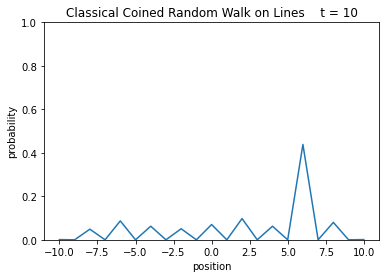

In [14]:
import numpy as np
import matplotlib.pyplot as plt


class CoinedQuantumWalkOnLines:
    def __init__(self, step: int, init_pos: int, init_state: np.array = None, coin_operator: np.array = None, shift_operator: np.ndarray = None):
        self.step = step
        self.coin_state = np.zeros([step * 2 + 1, 2])
        # default: [a, b] means a|0> + b|1>
        if init_state is None:
            init_state = np.array([1, 0])
        self.coin_state[step + init_pos] = init_state
        self.C = coin_operator
        self.S = shift_operator

        # default: unbiased coin (Hadamard gate).
        if self.C is None:
            self.C = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

        # default: |0> +1, |1> -1
        # if self.S is None:
        #     self.S = np.array([[1, 0], [0, -1]])

    def throw_coin(self):
        self.coin_state = (self.C @ self.coin_state.T).T

    def shift(self):
        new_state = self.coin_state.copy()
        for n in np.where(abs(self.coin_state[:, 0]) > 0)[0]:
            new_state[n + 1][0] += self.coin_state[n][0]
            new_state[n][0] -= self.coin_state[n][0]

        for n in np.where(abs(self.coin_state[:, 1]) > 0)[0]:
            new_state[n - 1][1] += self.coin_state[n][1]
            new_state[n][1] -= self.coin_state[n][1]
        self.coin_state = new_state

    def run(self):
        plt.ion()
        x = np.arange(-self.step, self.step + 1)
        for t in range(self.step + 1):

            if t > 0:
                self.throw_coin()
                print(self.coin_state)
                self.shift()
            plt.cla()
            plt.plot(x, sum(self.coin_state.T**2))
            plt.ylim(0, 1.0)
            plt.xlabel('position')
            plt.ylabel('probability')
            plt.title('Classical Coined Random Walk on Lines    t = ' + str(t))
            plt.pause(1e-2)
        plt.ioff()
        plt.show()


def main():
    random_walk = CoinedQuantumWalkOnLines(step=10, init_pos=0)
    random_walk.run()


if __name__ == "__main__":
    main()


